In [1]:
import os, glob, pathlib
from nilearn import image, plotting
import numpy as np
import pandas as pd
import argparse

In [2]:

img_flist = ['/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0029/sub-0029_ses-01_run-01_runtype-vicarious_event-stimulus_trial-006_cuetype-low_stimintensity-high.nii.gz']
stacked_singletrial = image.concat_imgs(sorted(img_flist))
signature_key = "NPS"
signature_dict = {
    "NPS": "weights_NSF_grouppred_cvpcr.img.gz",  # Wager et al. 2013 NPS   - somatic pain
    "NPSpos": "NPSp_Lopez-Sola_2017_PAIN.img.gz",  # 2017 Lopez-Sola positive NPS regions only
    "NPSneg": "NPSn_Lopez-Sola_2017_PAIN.img.gz",  # 2017 Lopez-Sola negative NPS regions only, excluding visual
    "SIIPS": "nonnoc_v11_4_137subjmap_weighted_mean.nii",  # Woo 2017 SIIPS - stim-indep pain,
    "PINES": "Rating_Weights_LOSO_2.nii",  # Chang 2015 PINES - neg emo
    "Rejection": "dpsp_rejection_vs_others_weights_final.nii",  # Woo 2014 romantic rejection
    "VPS": "bmrk4_VPS_unthresholded.nii",  # Krishnan 2016 Vicarious pain VPS
    "VPSnooccip": "Krishnan_2016_VPS_bmrk4_Without_Occipital_Lobe.nii",  # Krishnan 2016 no occipital
    "GSR": "ANS_Eisenbarth_JN_2016_GSR_pattern.img",  # Eisenbarth 2016 autonomic - GSR,
    "Heart": "ANS_Eisenbarth_JN_2016_HR_pattern.img",  # Eisenbarth 2016 autonomic - heart rate (HR)
    "FMMultisens": "FM_Multisensory_wholebrain.nii",  # 2017 Lopez-Sola fibromyalgia,
    "FMpain": "FM_pain_wholebrain.nii",  # 2017 Lopez-Sola fibromyalgia
    "EmpathicCare": "Ashar_2017_empathic_care_marker.nii",  # 2017 Ashar et al. Empathic care and distress
    "EmpathicDist": "Ashar_2017_empathic_distress_marker.nii",
    "Guilt_behavior": "Yu_guilt_SVM_sxpo_sxpx_EmotionForwardmask.nii",  # Yu 2019 Cer Ctx Guilt behavior
    # Kragel 2015 emotion PLS maps
    "Amused": "mean_3comp_amused_group_emotion_PLS_beta_BSz_10000it.nii.gz ",
    "Angry": "mean_3comp_angry_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    "Content": "mean_3comp_neutral_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    "Fearful": "mean_3comp_fearful_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    "Neutral": "mean_3comp_neutral_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    "Sad": "mean_3comp_sad_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    "Surprised": "mean_3comp_surprised_group_emotion_PLS_beta_BSz_10000it.nii.gz",
    # Kragel 2018 whole-brain pain cog control neg emotion
    "Kragel18Pain": "bPLS_Wholebrain_Pain.nii",
    "Kragel18CogControl": "bPLS_Wholebrain_Cognitive_Control.nii",
    "Kragel18NegEmotion": "bPLS_Wholebrain_Negative_Emotion.nii",
    "Reddan18CSplusvsCSminus": "IE_ImEx_Acq_Threat_SVM_nothresh.nii",
    "GeuterPaincPDM": "Geuter_2020_cPDM_combined_pain_map.nii",
    # Zhou 2020 eLife vicarious pain
    "ZhouVPS": "General_vicarious_pain_pattern_unthresholded.nii",
    # MPA2 general vs. specific aversiveness',
    "GeneralAversive": "General_bplsF_unthr.nii",
    "Mechpain": "Mechanical_bplsF_unthr.nii",
    "ThermalPain": "Thermal_bplsF_unthr.nii",
    "AversiveSound": "Sound_bplsF_unthr.nii",
    "AversiveVisual": "Visual_bplsF_unthr.nii",
    # Wager 2011 prediction of placebo brain [P - C]->behav [P - C],
    "PlaceboPvsC_Antic": "PlaceboPredict_Anticipation.img",
    # During pain [P - C]->behav [P - C],
    "PlaceboPvsC_Pain": "PlaceboPredict_PainPeriod.img",
    "Stroop": "stroop_pattern_wani_121416.nii",
}


In [3]:
sig_df = pd.DataFrame(columns=["singletrial_fname"])
# df = utils_extractsignature(img_flist, signature_dict, signature_key, brain_mask_path)
mask_priv_dir = "/Users/h/Documents/MATLAB/MasksPrivate/Masks_private"
mask_priv_fname = glob.glob(
        os.path.join(mask_priv_dir, "**", signature_dict[signature_key] + "*"),
        recursive=True,
    )
signature_fname = mask_priv_fname[0]
print(f"key: {signature_key}, signature filename: {mask_priv_fname}")


key: NPS, signature filename: ['/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.img.gz']


(array([2.00000e+00, 5.30000e+01, 3.77800e+03, 4.52838e+05, 1.42000e+03,
        1.28000e+02, 4.20000e+01, 2.00000e+01, 9.00000e+00, 4.00000e+00]),
 array([-7.18104029, -5.01492372, -2.84880714, -0.68269057,  1.483426  ,
         3.64954257,  5.81565914,  7.98177571, 10.14789228, 12.31400886,
        14.48012543]),
 <BarContainer object of 10 artists>)

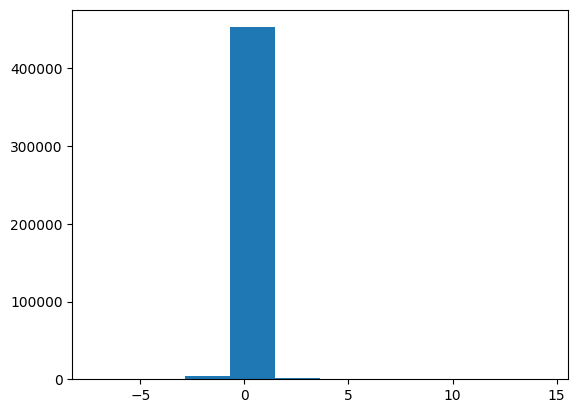

In [68]:
import matplotlib.pyplot as plt
plt.hist(stacked_singletrial.get_fdata().ravel())

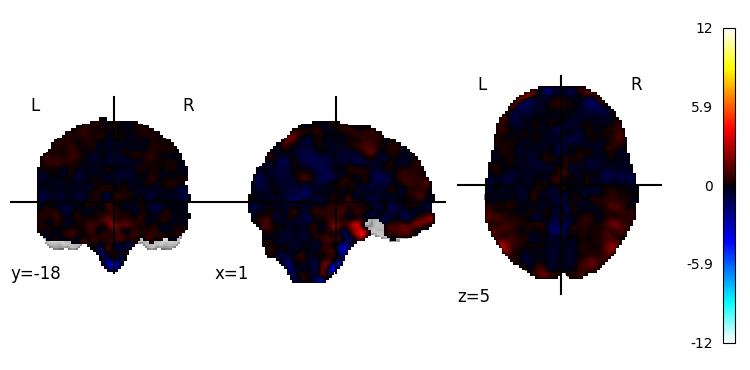

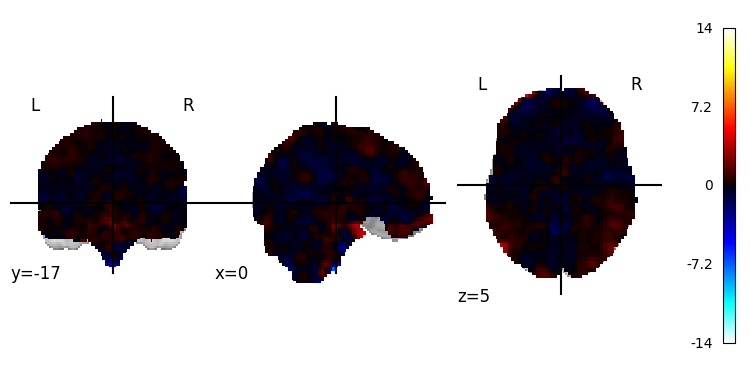

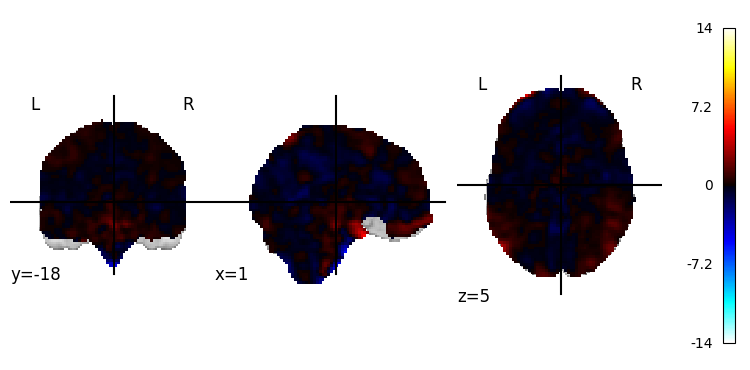

In [38]:
plotting.plot_stat_map(resampled_img)
resampled_imgN = image.resample_to_img(source_img=img, target_img=brain_mask_img, interpolation='nearest')
plotting.plot_stat_map(resampled_imgN)
plotting.plot_stat_map(img)

##brain mask

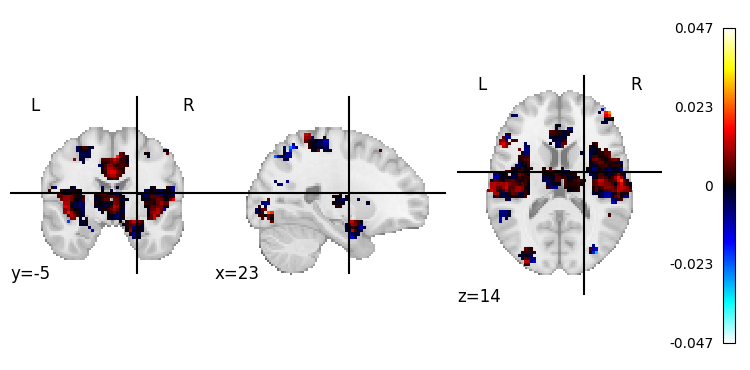

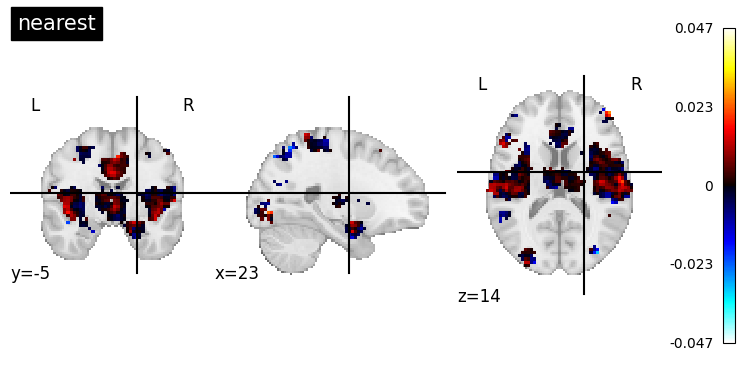

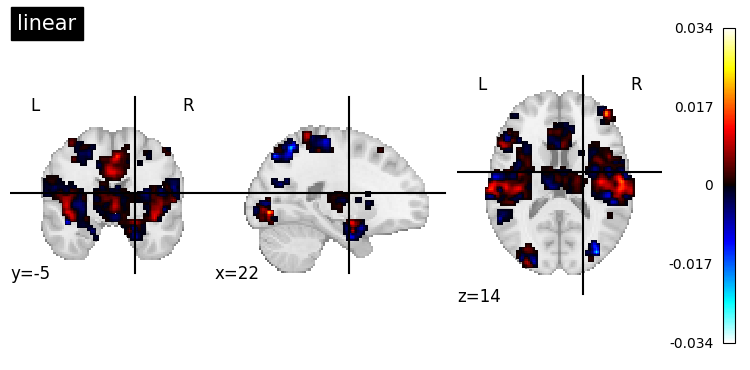

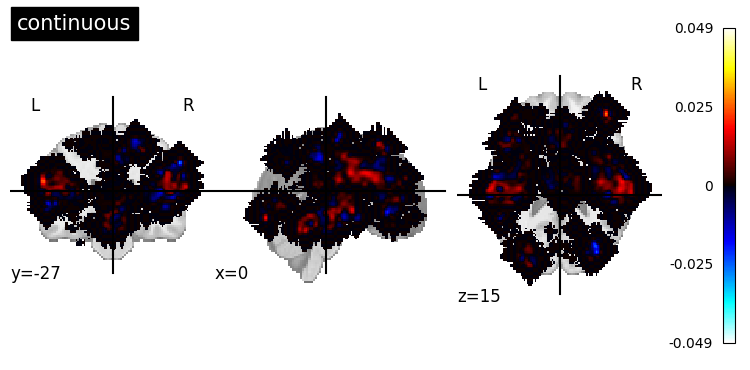

In [45]:
brain_mask_path = '/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii'

brain_mask_img = image.load_img(brain_mask_path)
if not signature_fname:
    raise ValueError(f"Signature '{signature_key}' not found in signature_dict.")
signature_img = image.load_img('/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz')
plotting.plot_stat_map(signature_img, title="original NPS")
    # Resample signature to the brain mask
resampled_signature = image.resample_to_img(source_img=signature_img, target_img=brain_mask_img, interpolation='nearest')
plotting.plot_stat_map(resampled_signature, title="nearest")

resampled_signature_linear = image.resample_to_img(source_img=signature_img, target_img=brain_mask_img, interpolation='linear')
plotting.plot_stat_map(resampled_signature_linear, title="linear")

resampled_signature_con = image.resample_to_img(source_img=signature_img, target_img=brain_mask_img, interpolation='continuous')
plotting.plot_stat_map(resampled_signature_con, title="continuous")


In [90]:
np.max(resampled_signature.get_fdata().ravel())

0.0467066653072834

In [72]:
np.max(resampled_img.get_fdata().ravel())

14.480125126117706

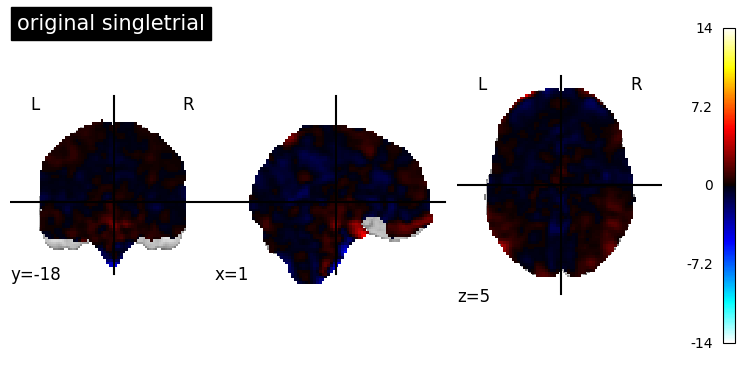

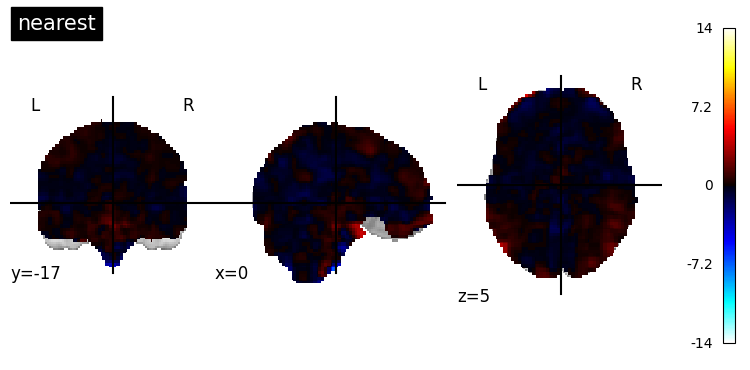

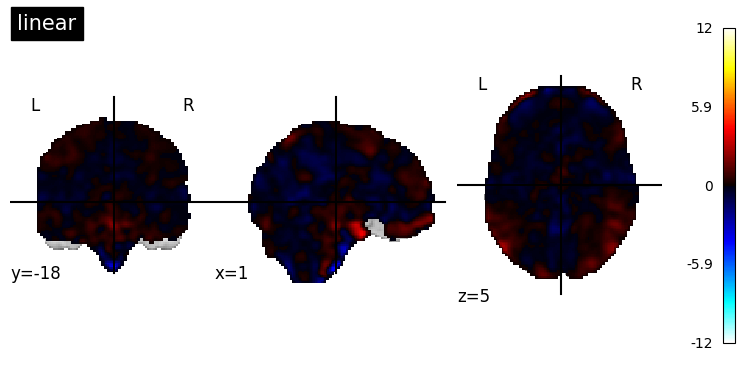

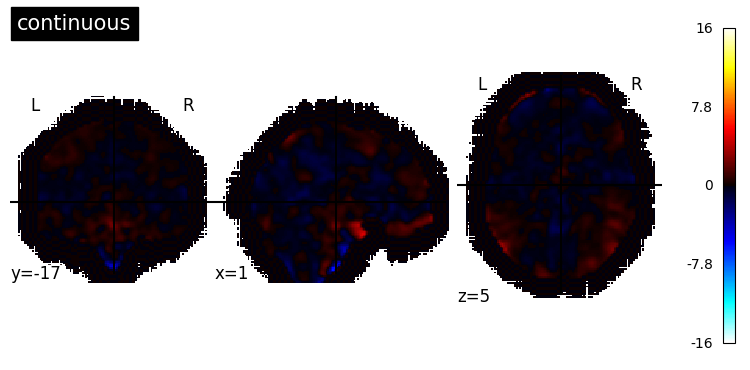

In [47]:
img = image.load_img(img_flist[0])
plotting.plot_stat_map(img, title="original singletrial")
    # Resample signature to the brain mask
resampled_img = image.resample_to_img(source_img=img, target_img=brain_mask_img, interpolation='nearest')
plotting.plot_stat_map(resampled_img, title="nearest")

resampled_imgL = image.resample_to_img(source_img=img, target_img=brain_mask_img, interpolation='linear')
plotting.plot_stat_map(resampled_imgL, title="linear")

resampled_imgC = image.resample_to_img(source_img=img, target_img=brain_mask_img, interpolation='continuous')
plotting.plot_stat_map(resampled_imgC, title="continuous")


In [58]:
dot_products = []

# Process each image in the file list
for img_path in sorted(img_flist):
    img = image.load_img(img_path)

    # Resample image to the brain mask
    resampled_img = image.resample_to_img(source_img=img, target_img=brain_mask_img, interpolation='nearest')

    # Mask both the resampled image and signature to only consider the overlapping voxels
    # masked_img_data = resampled_img.get_fdata()[brain_mask_img.get_fdata() > 0]
    # masked_signature_data = resampled_signature.get_fdata()[brain_mask_img.get_fdata() > 0]
    masked_img_data = resampled_img.get_fdata()[(resampled_signature.get_fdata() != 0) & (~np.isnan(resampled_signature.get_fdata()))]
    masked_signature_data = resampled_signature.get_fdata()[(resampled_signature.get_fdata() != 0) & (~np.isnan(resampled_signature.get_fdata()))]
    mask = (resampled_signature.get_fdata() != 0) & (~np.isnan(resampled_signature.get_fdata()))
    mask_img = resampled_img.get_fdata()[mask]
    mask_sig = resampled_signature.get_fdata()[mask]

    # Calculate dot product for the current image
    dot_product = np.dot(masked_img_data.flatten(), masked_signature_data.flatten())
    dot_products.append(dot_product)

    dot_text = np.dot(mask_img.flatten(), mask_sig.flatten())
print(dot_products)
print(dot_text)

[-25.377625081118442]
-25.377625081118442


In [59]:
A = np.array([1,2,3])
B = np.array([4,5,6])
np.dot(A,B)

32

In [63]:
np.vdot(mask_img.flatten(), mask_sig.flatten())

-25.377625081118442

In [57]:
resampled_signature.get_fdata().shape

(121, 145, 121)

In [11]:
masked_clean_data = masked_img_data.ravel()[~np.isnan(masked_img_data.ravel())]
signature_clean_data = masked_signature_data.ravel()[~np.isnan(masked_signature_data.ravel())]

In [18]:
len(masked_clean_data)
len(signature_clean_data)

576094

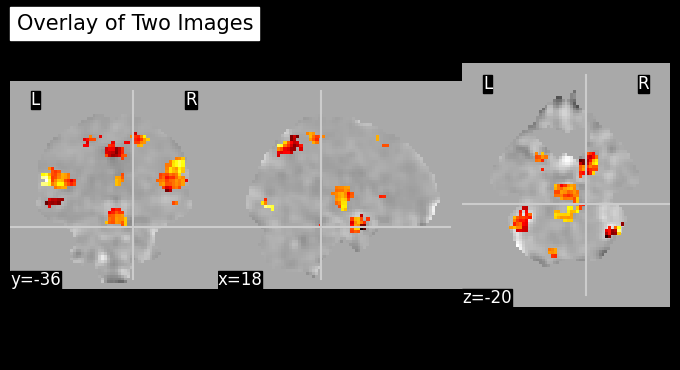

In [6]:
display = plotting.plot_anat(img, title="Overlay of Two Images", display_mode='ortho', dim=-1)
display.add_overlay(signature_img, cmap='hot')
plotting.show()

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


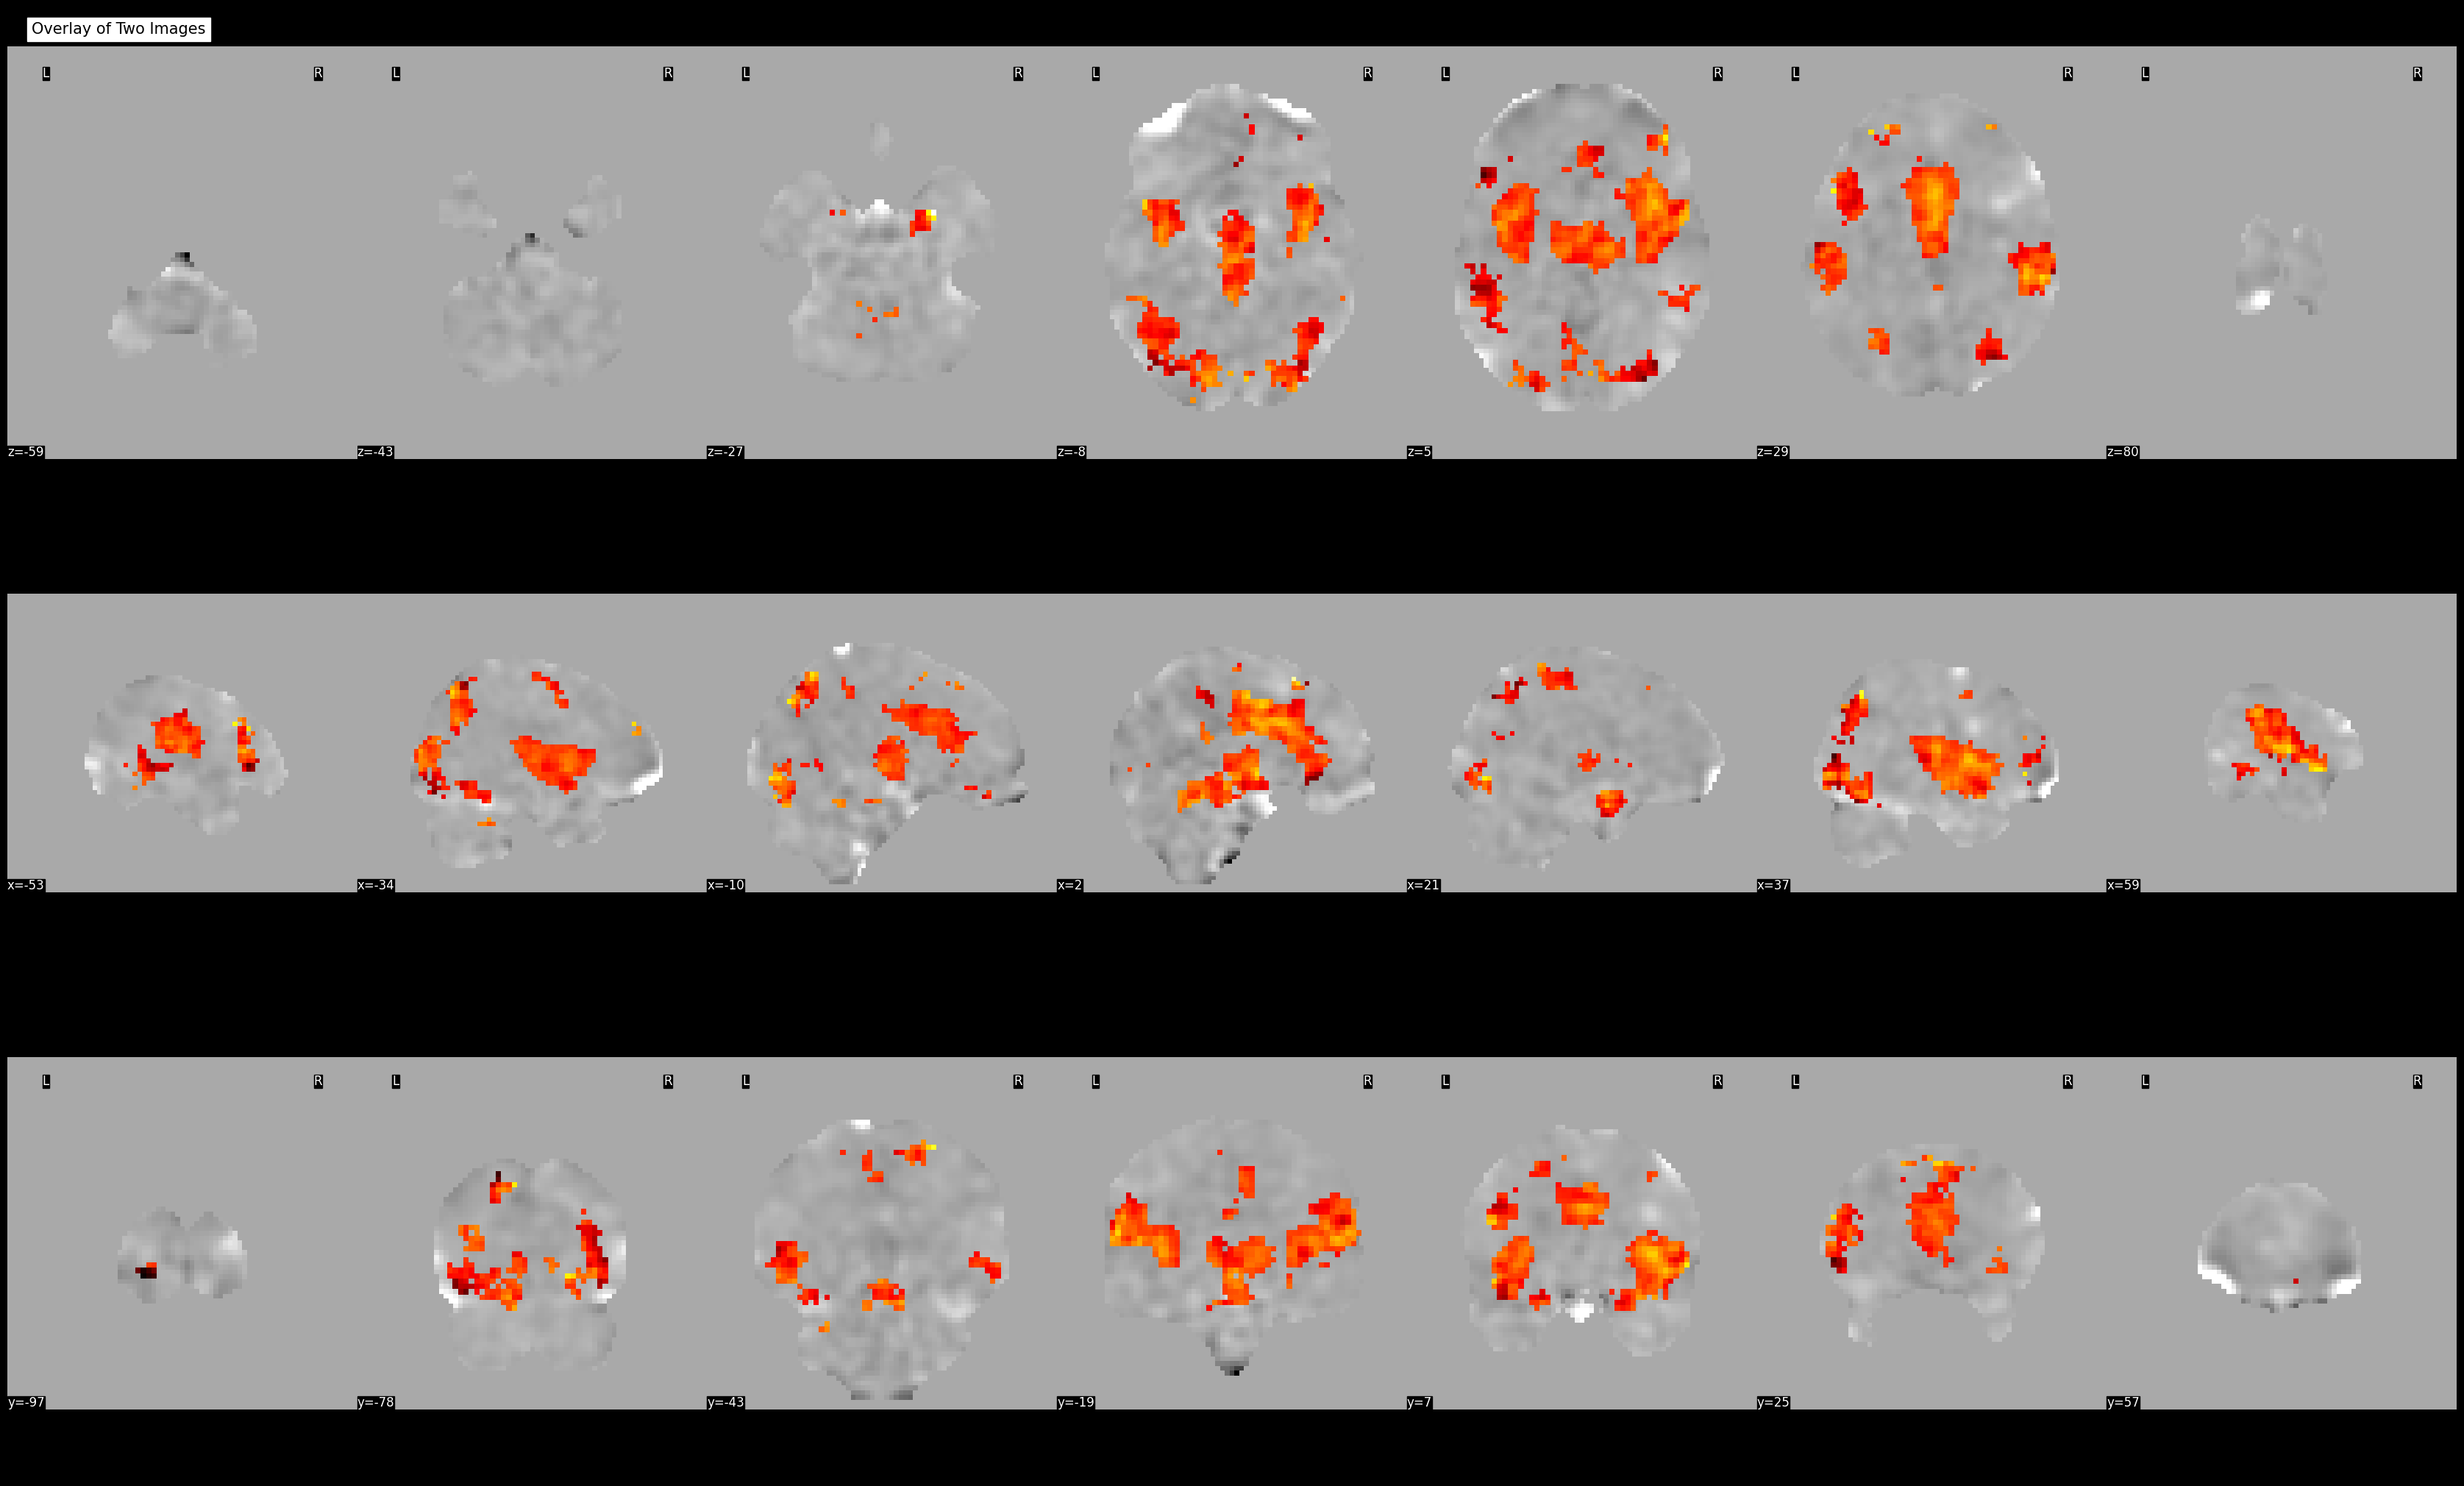

In [7]:
display = plotting.plot_anat(img, title="Overlay of Two Images", display_mode='mosaic', dim=-1)
display.add_overlay(signature_img, cmap='hot')
plotting.show()

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


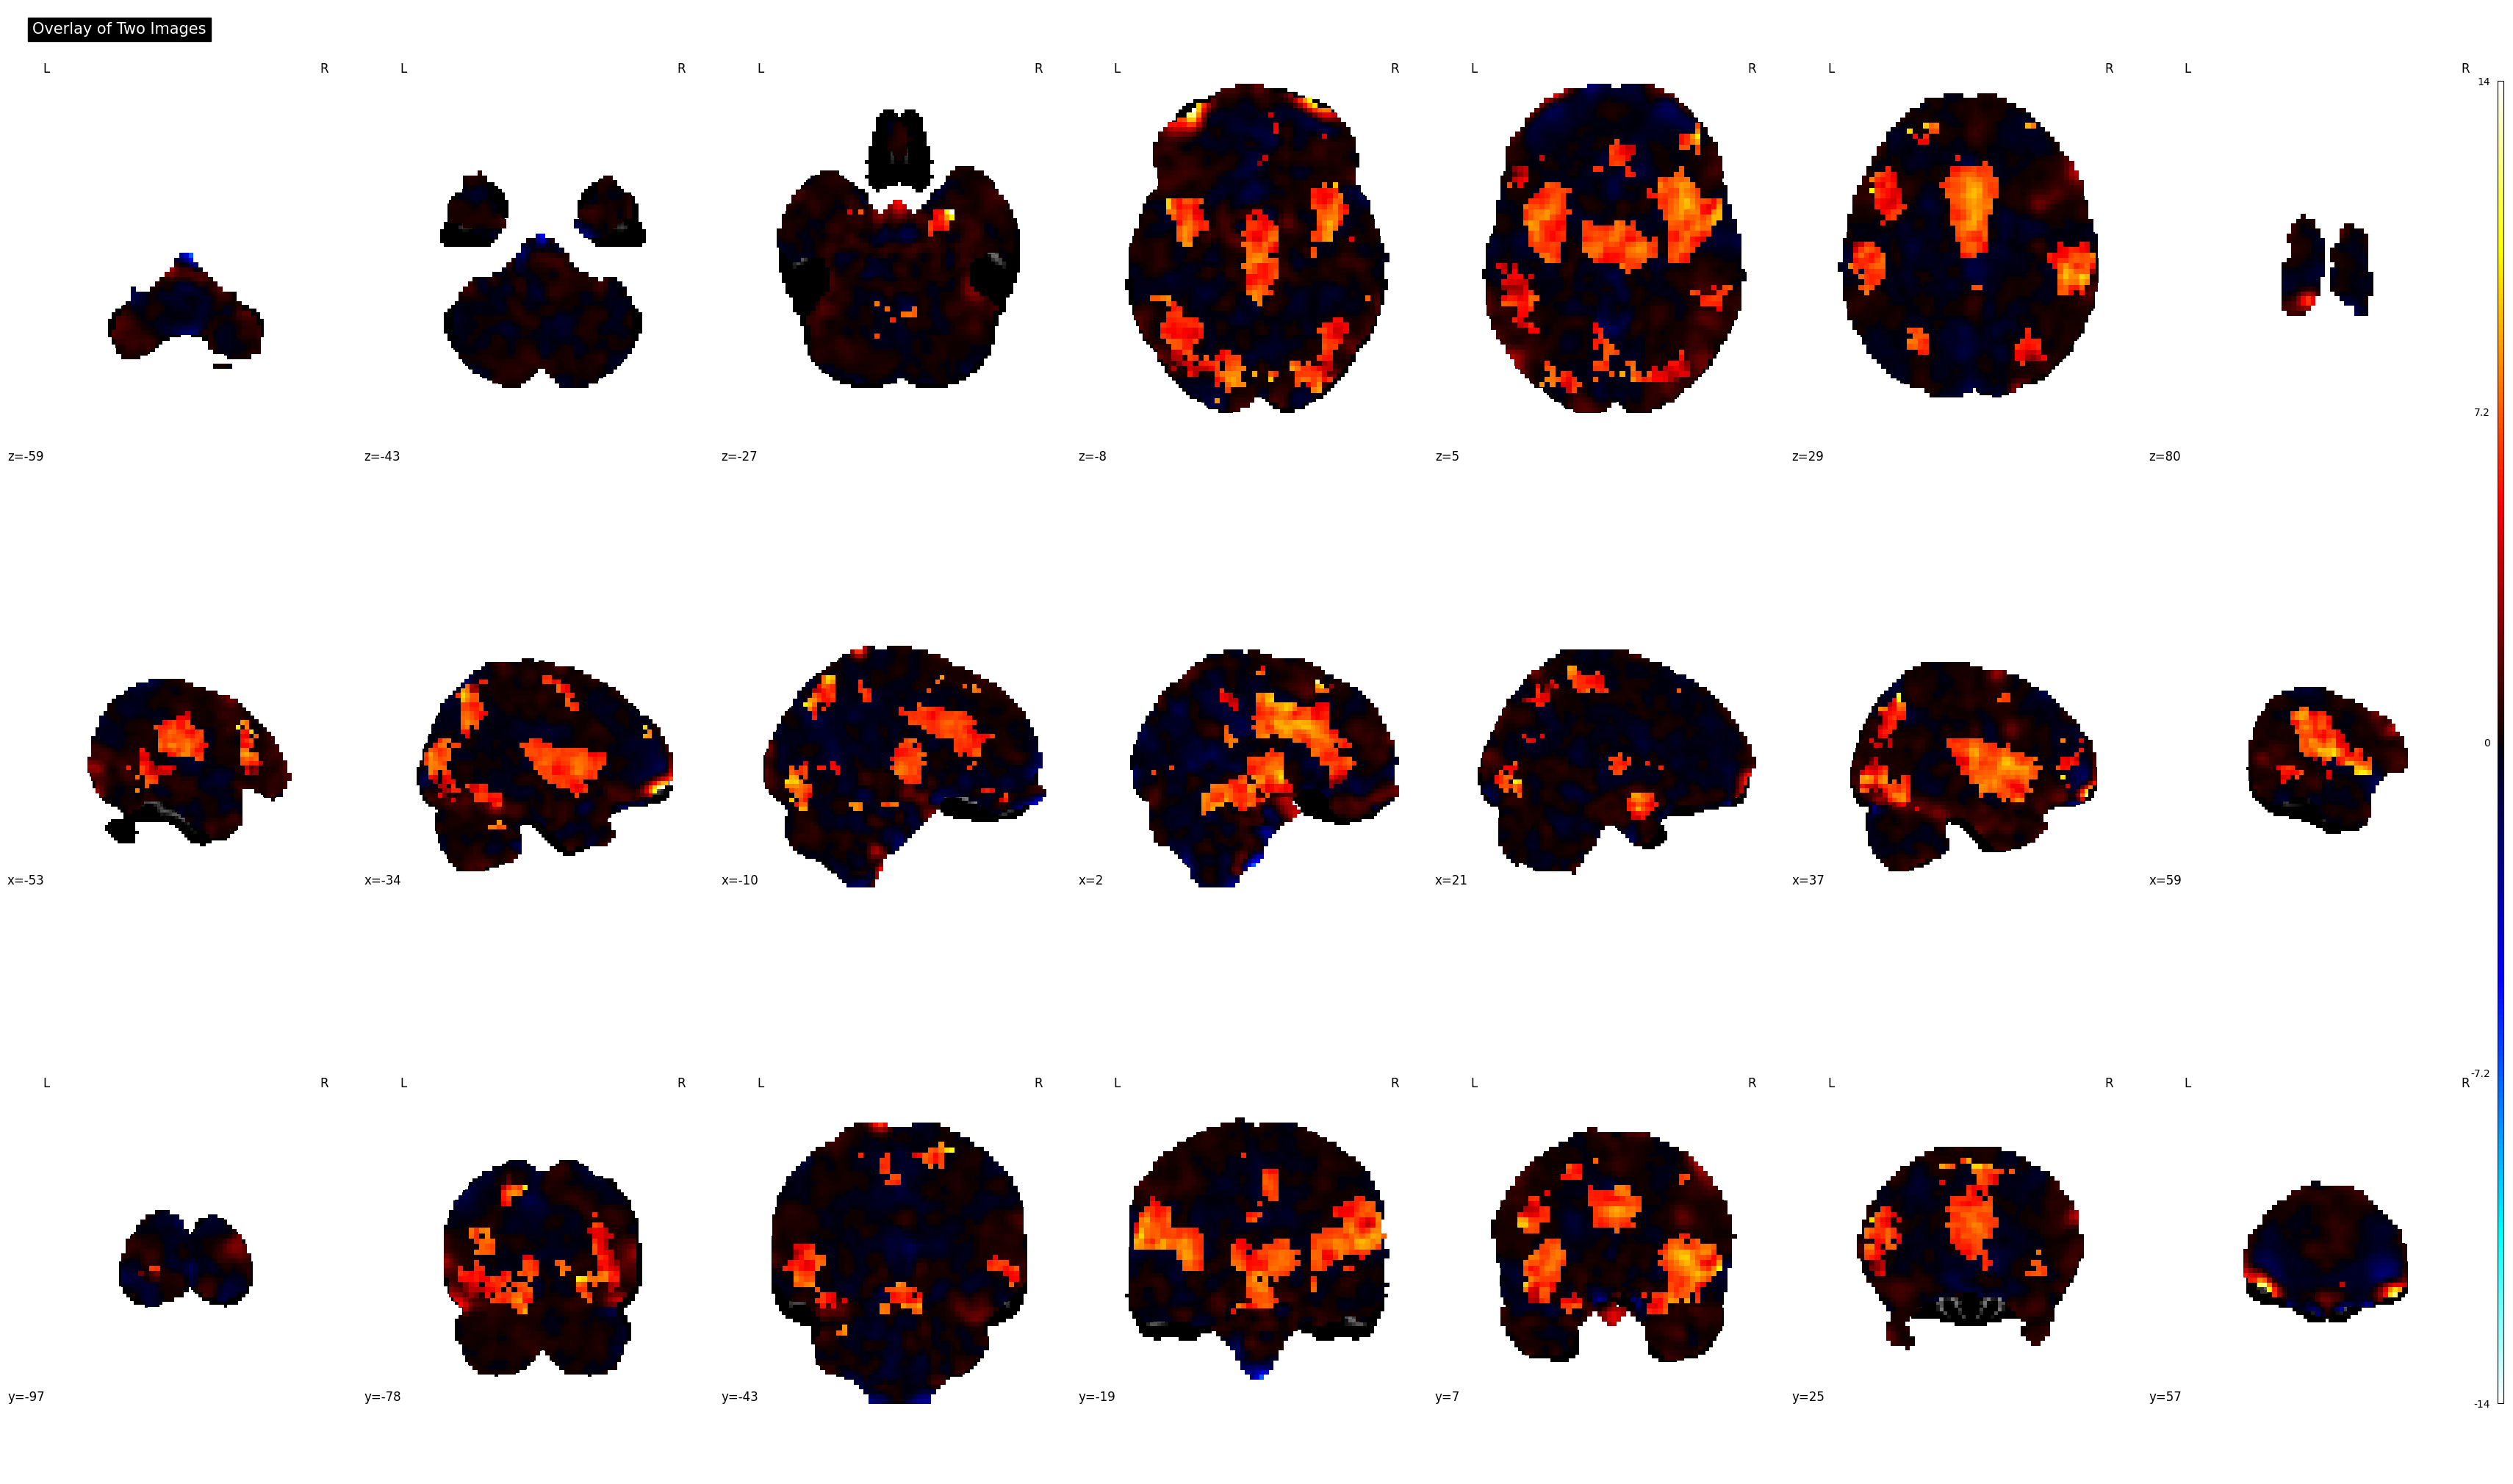

In [8]:
display = plotting.plot_stat_map(img, title="Overlay of Two Images", display_mode='mosaic', dim=-1)
display.add_overlay(signature_img, cmap='hot')
plotting.show()

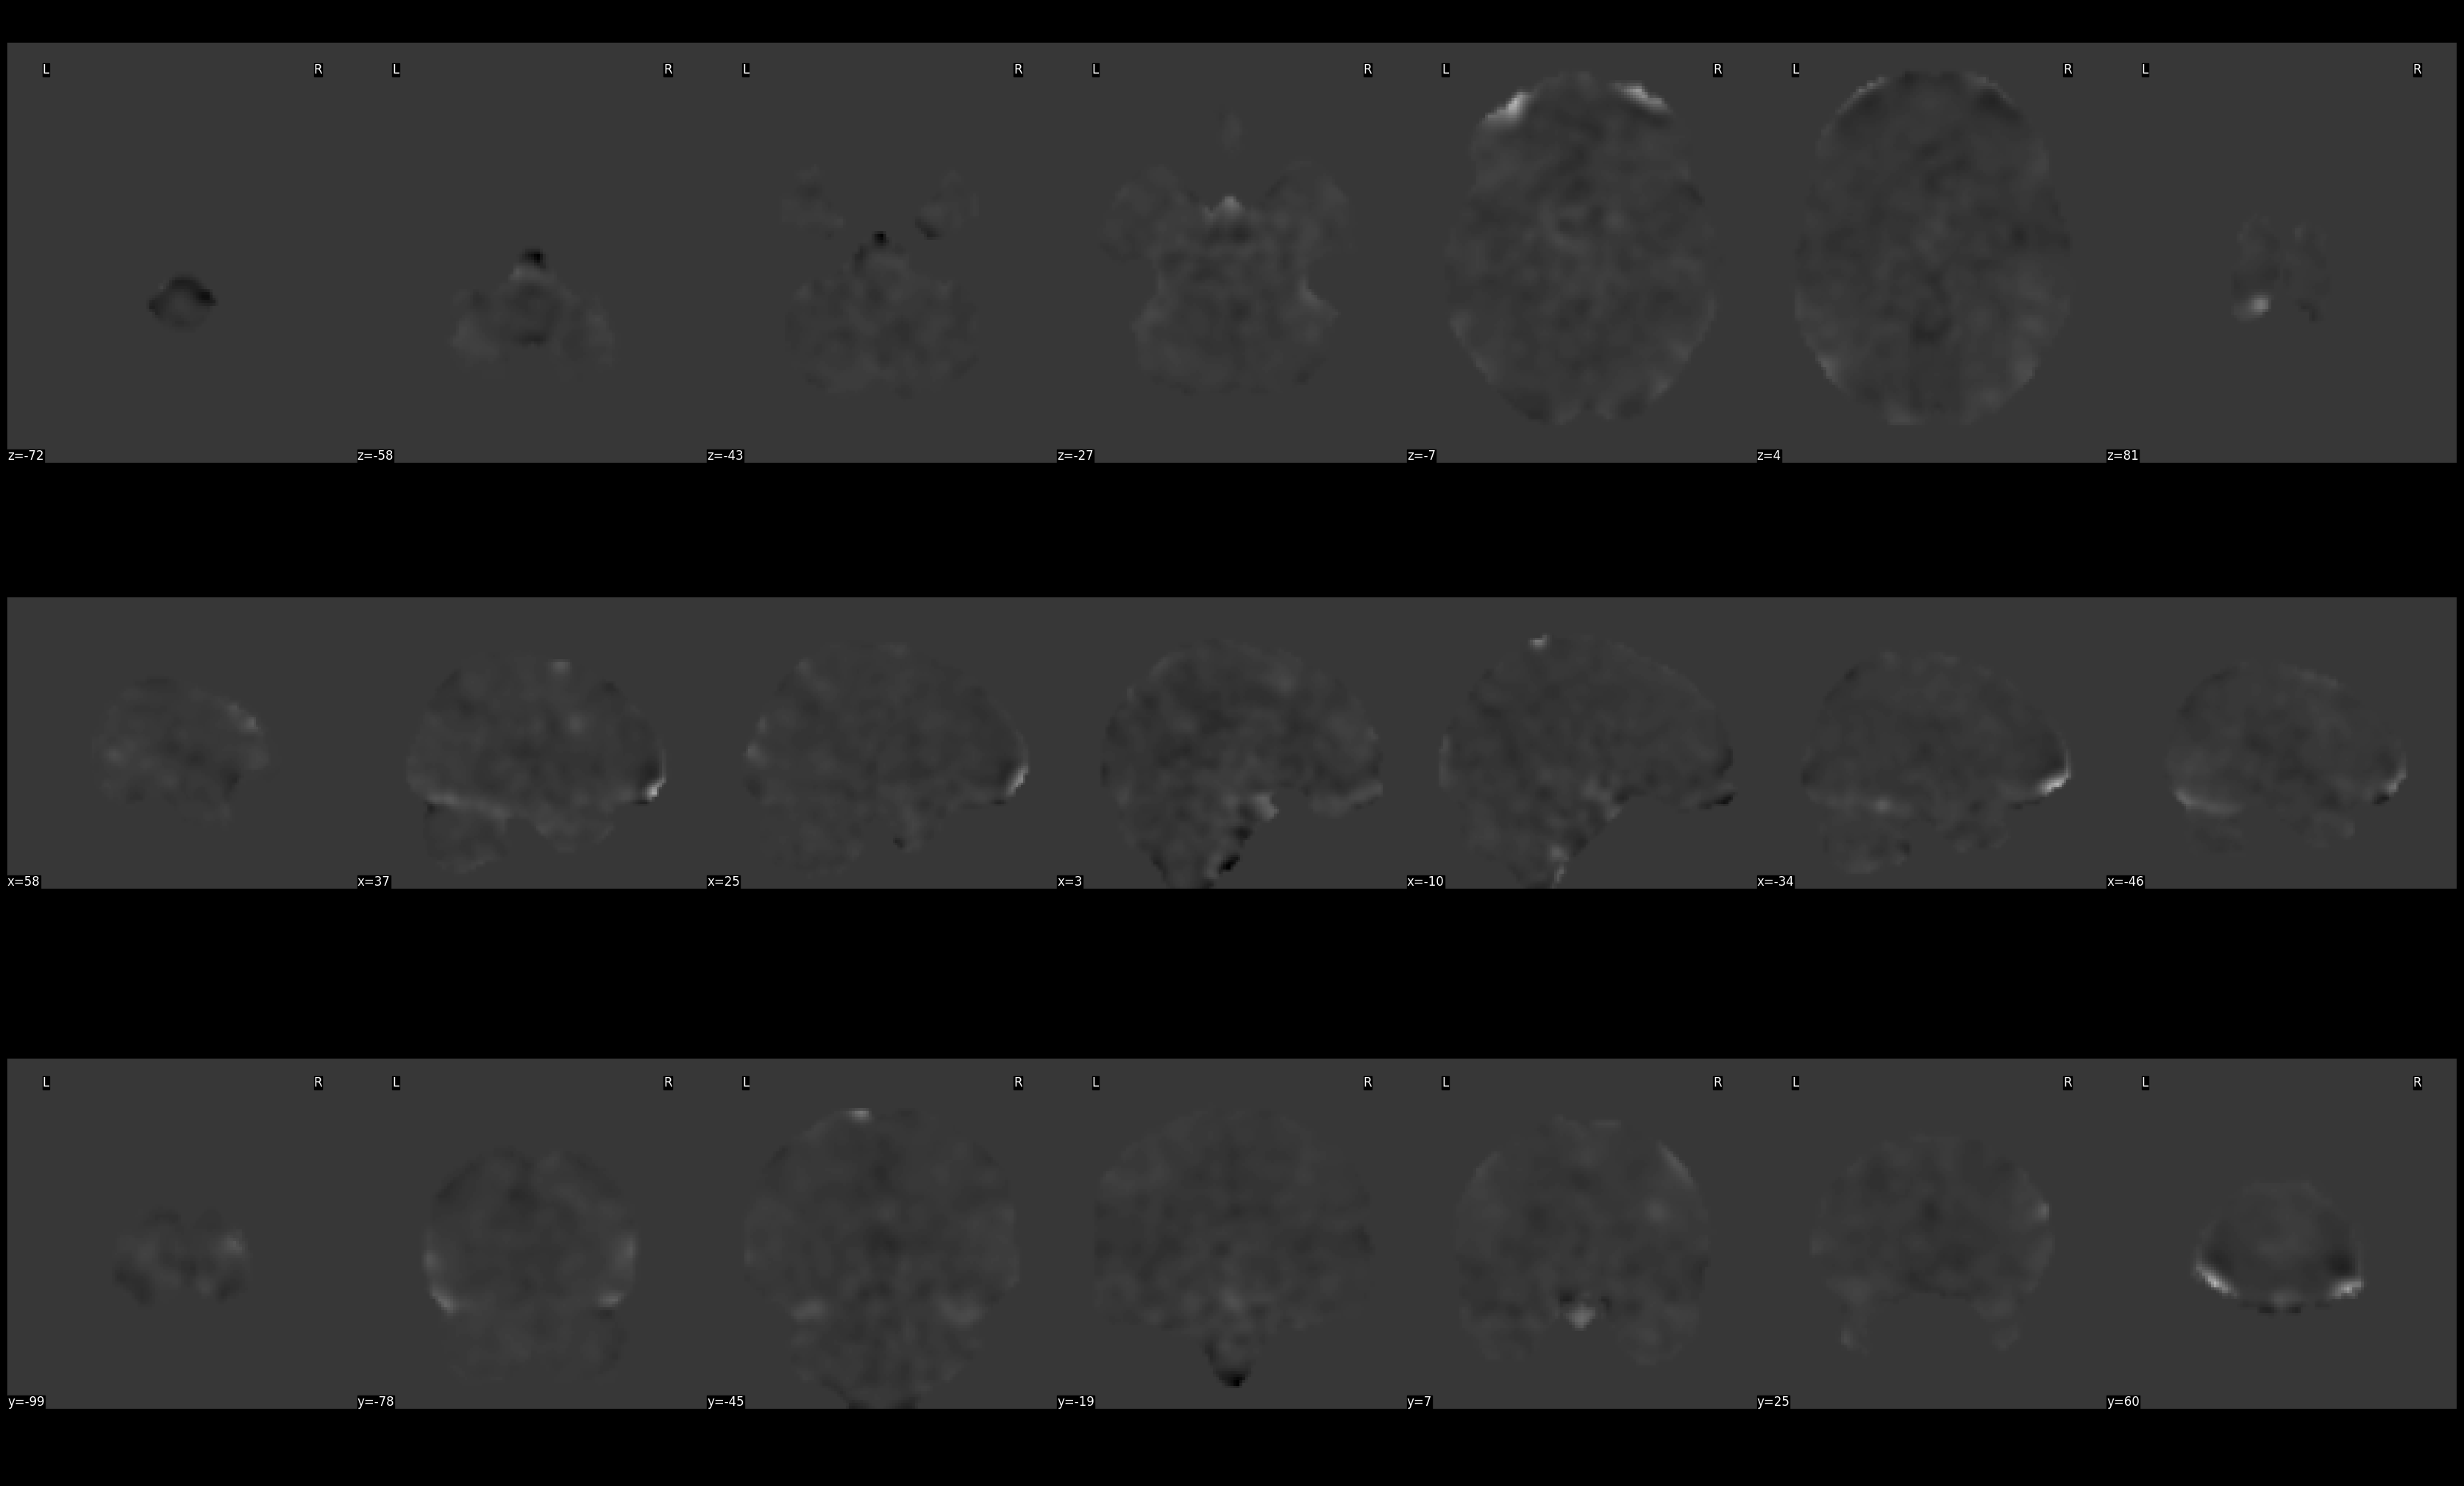

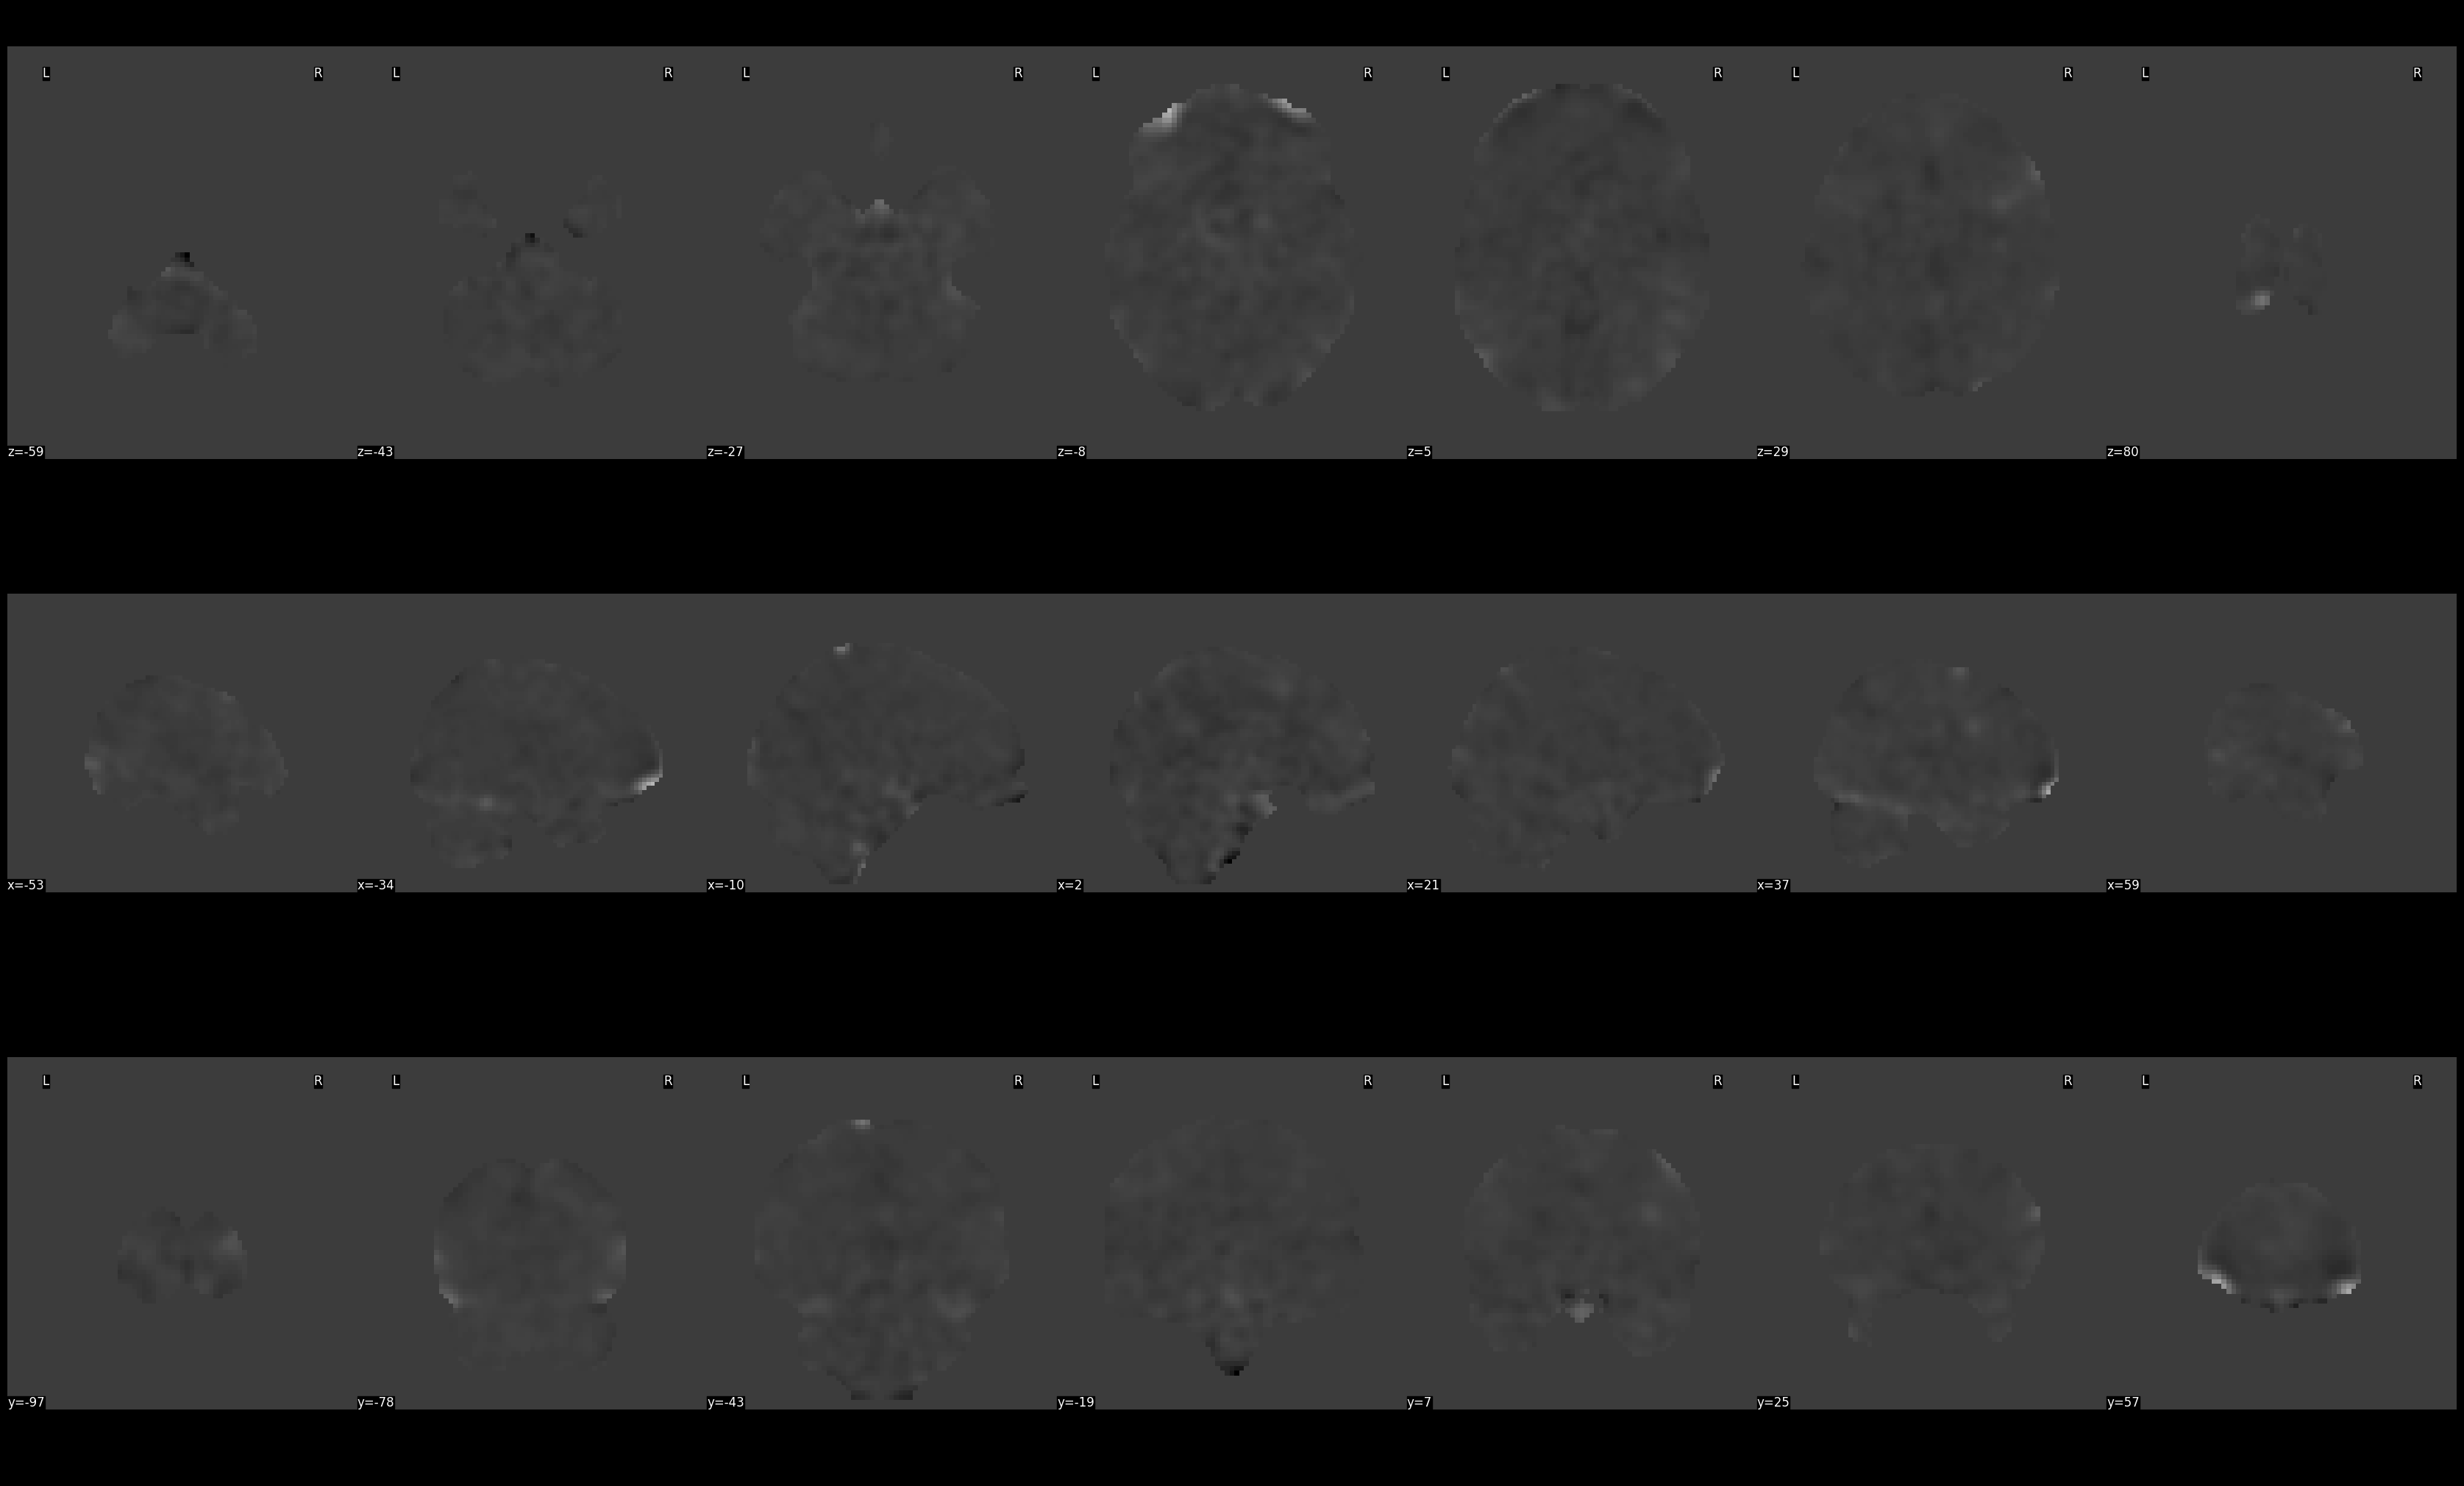

In [9]:
plotting.plot_anat(resampled_img, display_mode='mosaic')
plotting.plot_anat(img, display_mode='mosaic')

# nifti masker

In [86]:
from nilearn.input_data import NiftiMasker
import nibabel as nib
# Load the brain mask
mask_img = image.load_img('/Users/h/Documents/MATLAB/CanlabCore/CanlabCore/canlab_canonical_brains/Canonical_brains_surfaces/brainmask_canlab.nii')
mask_data = mask_img.get_fdata()
binary_mask_data = (mask_data > 0).astype(int)  # Convert all non-zero values to 1

# Create a new NIfTI image with the binary data
binary_mask_img = nib.Nifti1Image(binary_mask_data, mask_img.affine, mask_img.header)
masker = NiftiMasker(mask_img=binary_mask_img, standardize=False, memory='nilearn_cache', verbose=1)

# Fit the masker to the brain image and transform it
img_flist = ['/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0029/sub-0029_ses-01_run-01_runtype-vicarious_event-stimulus_trial-006_cuetype-low_stimintensity-high.nii.gz']
brain_img = img_flist[0] #image.load_img(img_flist[0])
masked_data = masker.fit_transform(brain_img)

signature_img = image.load_img('/Users/h/Documents/MATLAB/MasksPrivate/Masks_private/2013_Wager_NEJM_NPS/weights_NSF_grouppred_cvpcr.nii.gz')
masked_signature = masker.fit_transform(signature_img)

dot_product_masker = np.dot(masked_data.ravel(), masked_signature.ravel())
# # Inverse transform to get a nifti image back with non-brain voxels set to zero
# zeroed_out_img = masker.inverse_transform(masked_data)

# # Save or further process the zeroed-out image
# zeroed_out_img.to_filename('path_to_zeroed_out_image.nii')


[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask
[NiftiMasker.fit] Loading data from None
[NiftiMasker.fit] Resampling mask


(array([1.3200e+02, 7.0904e+04, 4.9738e+05, 6.6590e+03, 5.6500e+02,
        2.4100e+02, 1.2400e+02, 6.0000e+01, 2.2000e+01, 7.0000e+00]),
 array([-4.087092  , -2.23037029, -0.37364857,  1.48307314,  3.33979485,
         5.19651656,  7.05323828,  8.90995999, 10.7666817 , 12.62340341,
        14.48012513]),
 <BarContainer object of 10 artists>)

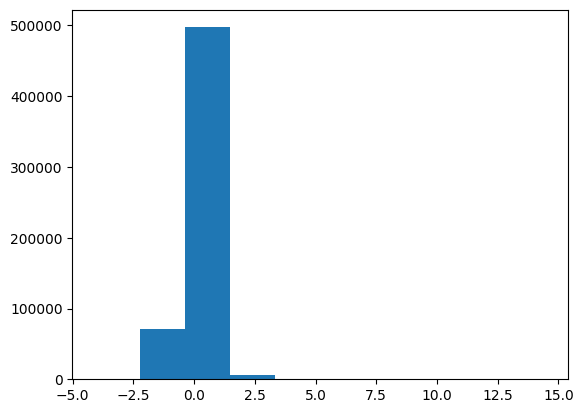

In [93]:
plt.hist(masked_data.ravel())

(array([2.40000e+01, 1.89000e+02, 1.24600e+03, 8.84800e+03, 5.34531e+05,
        2.75680e+04, 3.34400e+03, 2.98000e+02, 3.90000e+01, 7.00000e+00]),
 array([-0.04162802, -0.03279455, -0.02396108, -0.01512762, -0.00629415,
         0.00253932,  0.01137279,  0.02020626,  0.02903973,  0.0378732 ,
         0.04670667]),
 <BarContainer object of 10 artists>)

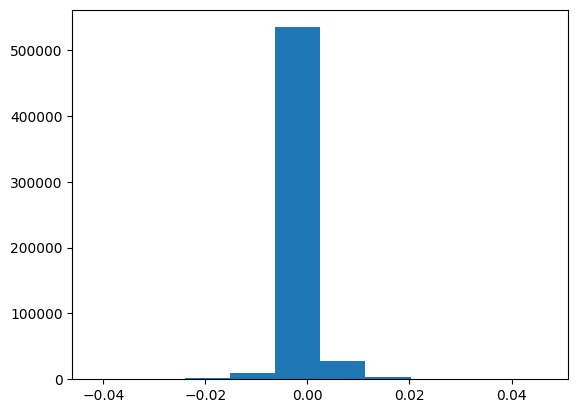

In [92]:
plt.hist(masked_signature.ravel())